In [1]:
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [2]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image


In [3]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1].item()))

In [4]:
IMAGE_SIZE = 16

transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
transforms.ToTensor()#
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [5]:
dataset_train=dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val=dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw



AttributeError: ignored

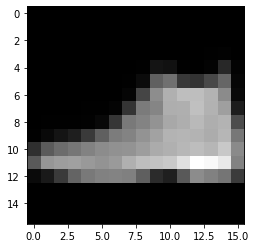

In [6]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

In [12]:
class CNN(torch.nn.Module):
  def __init__(self, out1 = 16, out2 = 32, out3 = 64, number_of_classes = 10):
    super(CNN, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels = out1, kernel_size = 5, padding = 2)
    self.conv1_bnn = torch.nn.BatchNorm2d(out1)

    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = 2)

    self.conv2 = torch.nn.Conv2d(in_channels = out1, out_channels = out2, kernel_size = 5, stride = 1, padding = 2)
    self.conv2_bnn = torch.nn.BatchNorm2d(out2)

    self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2)

    self.conv3 = torch.nn.Conv2d(in_channels = out2, out_channels = out3, kernel_size = 5, stride = 2, padding = 2)
    self.conv3_bnn = torch.nn.BatchNorm2d(out3)

    self.maxpool3 = torch.nn.MaxPool2d(kernel_size = 2)

    self.fc1 = torch.nn.Linear(out3 * 2 * 2, number_of_classes)
    self.bn_fc1 = torch.nn.BatchNorm1d(10)


  #Prediction
  def forward(self, x):
      x = self.conv1(x)
      x = self.conv1_bnn(x)
      x = torch.relu(x)
      x = self.maxpool1(x)
      x = self.conv2(x)
      x = self.conv2_bnn(x)
      x = torch.relu(x)
      x = self.maxpool2(x)
      x = self.conv3(x)
      x = self.conv3_bnn(x)
      x = torch.relu(x)
      x = self.maxpool3(x)
      x = x.view(x.size(0), -1)
      x = self.fc1(x)
      x = self.bn_fc1(x)
      return x 

In [13]:
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100 )
test_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100 )

In [14]:
model =CNN_batch(out_1=16, out_2=32,number_of_classes=10)

In [15]:
import time
start_time = time.time()

cost_list=[]
accuracy_list=[]
N_test=len(dataset_val)
learning_rate =0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
n_epochs=5
for epoch in range(n_epochs):
    cost=0
    model.train()
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()
        cost+=loss.item()
    correct=0
    #perform a prediction on the validation  data 
    model.eval()
    for x_test, y_test in test_loader:
        z = model(x_test)
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
    accuracy = correct / N_test
    accuracy_list.append(accuracy)
    cost_list.append(cost)

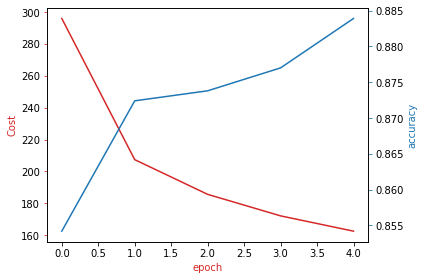

In [16]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()